<a href="https://colab.research.google.com/github/erlanggsss/heartDisease-Classification/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keterangan Dataset
1. age: Usia dalam format tahun
2. sex: jenis kelamin (1 = male; 0 = female)
3. cp: jenis nyeri dada (4 values => 1: angina tipikal, 2: angina atipikal, 3: nyeri non-angina, 4: asimptomatik)
4. trestbps: Tekanan darah saat istirahat (dalam mm Hg saat masuk rumah sakit)
5. chol: jumlah kolesterol dalam serum darah pada satuan mg/dl
6. fbs: Gula darah saat berpuasa > 120 mg/dl (1 = true, 0 = false)
7. restecg: hasil elektrokardiografi saat istirahat (values 0,1,2)
8. thalach: detak jantung maksimum yang dicapai
9. exang: Angina (nyeri dada) yang dipicu oleh latihan atau olahraga (1 = yes, 0 = no)
10. oldpeak: Depresi ST yang diinduksi oleh latihan relatif terhadap istirahat  (depresi ST merujuk pada temuan di elektrokardiogram, di mana jejak di segmen ST berada di bawah garis dasar secara abnormal)
11. slope: kemiringan segmen ST puncak selama latihan (0,1,2)
12. ca: jumlah pembuluh darah besar (0-3) yang diberi warna oleh fluoroskopi
13. thal: Jenis thalassemia, dengan tiga nilai berbeda (1 = normal, 2 = cacat tetap, 3 = cacat reversibel)
14. target: diagnosis penyakit jantung (status penyakit angiografik) (2 values => 0 = tidak ada penyakit, 1 = penyakit)

# **Import Library**

In [ ]:
# Import Library dan Modul
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from collections import Counter  # Import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc


1.   **Numpy :** NumPy digunakan untuk operasi matematika dan manipulasi array dalam Python. Dalam proyek ini, NumPy membantu dalam pengolahan dan analisis data numerik, seperti menghitung statistik deskriptif atau melakukan operasi vektor.

2.   **Pandas :** Pandas adalah library untuk analisis data yang menyediakan struktur data tingkat tinggi, yaitu DataFrame, dan alat untuk manipulasi data tabular. Dalam proyek ini, Pandas digunakan untuk membaca data dari file CSV, melakukan operasi slicing, indexing, dan penggabungan data, serta menyediakan fungsi untuk preprocessing data sebelum dimasukkan ke model.


3. **Seaborn :** Seaborn digunakan untuk visualisasi data statistik yang dibangun di atas matplotlib. Dalam proyek ini, Seaborn membantu dalam membuat berbagai plot visual seperti histogram, scatter plot, dan heatmap untuk mengeksplorasi dan memahami data.

3. **Matplotlib :** Matplotlib adalah library plotting yang digunakan untuk membuat grafik dan plot dalam Python. Dalam proyek ini, Matplotlib digunakan untuk menampilkan visualisasi data dari Seaborn, serta untuk membuat plot kustom dan grafik lainnya.

3. **Warnings :** Modul warnings digunakan untuk mengelola dan menangani pesan peringatan (warnings) yang dihasilkan selama eksekusi kode. Dalam proyek ini, warnings.filterwarnings("ignore") digunakan untuk menyembunyikan pesan peringatan yang tidak relevan atau yang tidak memerlukan tindakan langsung.

3. **Collections (from collections import Counter) :** Counter adalah bagian dari modul collections yang menyediakan alat untuk menghitung frekuensi elemen dalam sebuah iterable. Dalam proyek ini, Counter digunakan untuk mengidentifikasi indeks yang merupakan outlier berdasarkan frekuensi kemunculannya dalam data.

3. **Sklearn.preprocessing (from sklearn.preprocessing import StandardScaler) :** StandardScaler adalah bagian dari sklearn.preprocessing yang digunakan untuk menormalkan atau menskalakan fitur-fitur numerik agar memiliki mean nol dan variansi satu. Dalam proyek ini, StandardScaler digunakan untuk menskalakan fitur-fitur numerik sebelum dimasukkan ke dalam model machine learning.

3. **Sklearn.model_selection :** Sklearn.model_selection menyediakan alat untuk membagi dataset menjadi data latih dan data uji, melakukan validasi silang, serta pencarian parameter terbaik untuk model. Dalam proyek ini, digunakan untuk membagi dataset, mengimplementasikan validasi silang dengan StratifiedKFold, dan mencari parameter terbaik untuk model SVM menggunakan GridSearchCV.

3. **Sklearn.svm (from sklearn.svm import SVC) :** SVC (Support Vector Classifier) adalah implementasi dari Support Vector Machine (SVM) untuk klasifikasi. Dalam proyek ini, SVC digunakan untuk melatih model klasifikasi SVM dengan berbagai parameter untuk memprediksi kondisi penyakit jantung berdasarkan fitur-fitur yang ada.

3. **Sklearn.metrics :** Sklearn.metrics menyediakan berbagai metrik evaluasi untuk mengukur kinerja model machine learning, seperti akurasi, F1-score, classification report, confusion matrix, ROC curve, dan lainnya. Dalam proyek ini, digunakan untuk mengevaluasi performa model SVM yang telah dilatih dengan metrik-metrik tersebut.


# **Summary**

In [ ]:
# Membaca file CSV
df = pd.read_csv('heart.csv')

Fungsi diatas digunakan untuk membaca dataset yang sudah di import menggunakan library pandas keladam sebuah objetk DataFrame (df).

In [ ]:
# Menampilkan jumlah kolom dan baris dalam dataset
df.shape

(1025, 14)

Fungsi diatas digunakan untuk menampilkan jumplah baris dan kolom dalam dataset

In [ ]:
# Menampilkan kolom dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Fungsi diatas digunakan untuk menampilkan daftar nama kolom dalam dataset. Ini dapat membantu untuk memahami atribut apa saja yang ada di dalam dataset

In [ ]:
# Menampilkan beberapa kolom dan baris
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Fungsi diatas digunakan untuk menampilkam beberapa baris dari dataset yang dapat disesuaikan dengan keinginan kita untuk memberikan gambaran isi dari setiap atribut dataset.

In [ ]:
# Menampilkan ringkaran statistik deskriptif dari dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Fungsi diatas digunakan untuk memberikan ringkasan statistik deskriptif dari dataset, termasuk statistik seperti mean, standar deviasi, nilai minimum, kuartil, dan nilai maksimum.

In [ ]:
# Menampilkan nilai non null dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Fitur Kategorikal :** sex, cp, fbs, restecg, exang, slope, ca, thal

**Fitur Numerik :** age, trestbps, chol, thalach, oldpeak

In [ ]:
# Mendefinisikan fitur kategorikal dan numerikal
categorical_feature_list = ["sex", "cp", "fbs","restecg", "exang", "slope",
                            "ca", "thal"]

numerical_feature_list = ["age", "trestbps", "chol",
                          "thalach", "oldpeak"]



*   **Categorical_feature_list :** Berisi nama-nama kolom yang memiliki nilai kategorikal atau kualitatif, seperti jenis kelamin, tipe nyeri dada, dan lainnya.

*   **Numerical_feature_list :** Berisi nama-nama kolom yang memiliki nilai numerik atau kuantitatif, seperti usia, tekanan darah, kadar kolesterol, dan lainnya.

Kedua variabel tersebut akan saya gunakan pada tahap preprocessing dan modeling



# **Preprocessing**

In [ ]:
# Melakukan pengecekan missing value pada dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Fungsi **isnull().sum()** digunakan untuk menghitung jumlah nilai null (kosong) dalam setiap kolom dari dataframe df.

 Hasilnya menunjukkan bahwa tidak ada nilai null atau missing value dalam dataset ini, sehingga tidak perlu dilakukan handling atau penanganan khusus untuk missing value.

In [ ]:
# Menghapus baris dengan nilai tertentu di kolom "ca" dan "thal"
df.drop(df[df["ca"] == 4].index, inplace = True)
df.drop(df[df["thal"] == 0].index, inplace = True)

Fungsi diatas digunakan untuk menghapus baris-baris dari dataframe df dimana kolom "ca" memiliki nilai 4 atau kolom "thal" memiliki nilai 0.

Ini saya lakukan karena nilai-nilai ini muncul hanya sedikit pada dataset dan mungkin tidak sesuai atau tidak relevan dengan analisis yang akan saya lakukan, sehingga menurut saya lebih baik untuk dihapus agar proses modelling bisa dilakukan dengan maksimal.

In [ ]:
# Menghitung nilai rata-rata fitur "age" untuk nilai target
df[["target","age"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,age
0,0,56.689024
1,1,52.590551


Fungsi diatas digunakan untuk menghitung nilai rata-rata dari fitur **"age"** untuk masing-masing nilai target (0 dan 1) dalam kolom **"target"**. Groupby dilakukan berdasarkan kolom **"target"** untuk memisahkan data berdasarkan kategori targetnya, kemudian dihitung nilai rata-ratanya.

Hasil :


*   Untuk individu yang tidak memiliki penyakit jantung (0), rata-rata usia adalah 56.69 tahun.
*   Untuk individu yang memiliki penyakit jantung (1), rata-rata usia adalah 52.59 tahun.
* Ini menunjukkan bahwa penyakit jantung cenderung lebih sering terjadi pada populasi yang lebih muda dalam dataset ini.






In [ ]:
#  Menghitung nilai rata-rata fitur "trestbps" untuk nilai target
df[["target","trestbps"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,trestbps
0,0,134.168699
1,1,129.096457



Hasil :

*   Untuk individu tanpa penyakit jantung (target=0), rata-rata tekanan darah istirahat adalah 134.17 mmHg.

*   Untuk individu dengan penyakit jantung (target=1), rata-rata tekanan darah istirahat adalah 129.10 mmHg.

* Ini menunjukkan bahwa rata-rata tekanan darah istirahat cenderung lebih rendah pada individu yang memiliki penyakit jantung.



In [ ]:
# Menghitung nilai rata-rata fitur "thalach" untuk nilai target
df[["target","thalach"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,thalach
0,0,138.969512
1,1,158.669291


* Untuk individu tanpa penyakit jantung (target=0), rata-rata detak jantung maksimum adalah 138.97 bpm (denyut per menit).

* Untuk individu dengan penyakit jantung (target=1), rata-rata detak jantung maksimum adalah 158.67 bpm.

* Ini menunjukkan bahwa individu dengan penyakit jantung memiliki rata-rata detak jantung maksimum yang lebih tinggi dibandingkan dengan mereka yang tidak memiliki penyakit jantung.

In [ ]:
# Menghitung nilai rata-rata fitur "oldpeak" untuk nilai target
df[["target","oldpeak"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,oldpeak
0,0,1.614228
1,1,0.587008


* Untuk individu tanpa penyakit jantung (target=0), rata-rata depresi ST adalah 1.61.

* Untuk individu dengan penyakit jantung (target=1), rata-rata depresi ST adalah 0.59.

* Ini menunjukkan bahwa rata-rata tingkat depresi ST lebih rendah pada individu yang memiliki penyakit jantung dibandingkan dengan mereka yang tidak memiliki penyakit jantung.

Tujuan Penghitungan Nilai Rata-rata Fitur untuk Nilai
Dalam konteks proyek saya adalah untuk mempersiapkan data sebelum membangun model SVM. Ini membantu saya dalam memahami hubungan antara fitur-fitur dan target, serta dalam memilih dan mengelola fitur-fitur yang paling relevan untuk model prediktif.

# **Outlier Detection**

In [ ]:
# Fungsi untuk mendeteksi outlier dalam dataset
def detect_outliers(df,features):
    outlier_indices = [] # Menginisialisasi list indeks outlier

    # Melakukan iterasi untuk setiap fitur
    for i in features:
        # Menghitung kuartil pertama, kuartil ketiga, dan IQR
        Q1 = np.percentile(df[i],25)
        Q3 = np.percentile(df[i],75)
        IQR = Q3 - Q1

        # Menghitung langkah outlier
        outlier_step = IQR * 1.5

        # Menentukan indeks outlier pada fitur saat ini
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index

        # Menambahkan indeks outlier ke dalam list
        outlier_indices.extend(outlier_list_col)

    # Menghitung jumlah indeks outlier untuk setiap data point
    outlier_indices = Counter(outlier_indices)

    # Memilih baris dengan lebih dari dua indeks outlier
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)

    # Mengembalikan list indeks outlier
    return multiple_outliers

In [ ]:
# Menggunakan fungsi 'Outlier_idices' untuk menemukan outlier dalam dataset
outlier_indices = detect_outliers(df, numerical_feature_list)
print("Outlier indices:", outlier_indices)

Outlier indices: []




1.   **Input Parameters**
  * **df :** Dataframe yang akan dianalisis untuk outlier.
  * **features :** List dari fitur-fitur numerik dalam dataframe **df** yang akan diperiksa untuk outlier.
2.   **Langkah-langkah dalam Fungsi**
  *   **Iterasi Fitur :** Fungsi ini melakukan iterasi melalui setiap fitur numerik yang diberikan dalam **features**.
  *   **Kuartil dan IQR :** Untuk setiap fitur, fungsi menghitung kuartil pertama **(Q1)**, kuartil ketiga **(Q3)**, dan Interquartile Range (IQR = **Q3** - **Q1**).
  *   **Langkah Outlier :** Menghitung langkah outlier **(outlier_step)** sebagai **1.5 * IQR**.
  *   **Deteksi Outlier :** Mengidentifikasi indeks baris dalam dataframe yang dianggap outlier berdasarkan kriteria: Nilai di bawah **Q1 - outlier_step** atau nilai di atas **Q3 + outlier_step**.
  *   **Pengumpulan Indeks Outlier :** Menambahkan indeks-indeks baris yang terdeteksi sebagai outlier ke dalam **outlier_indices**.
  *   **Penghitungan Outlier :** Menghitung jumlah kemunculan setiap indeks outlier menggunakan **Counter**.
  *   **Seleksi Outlier :** Memilih indeks baris yang memiliki lebih dari dua kemunculan sebagai outlier (dapat disesuaikan sesuai kebutuhan).

3. **Output,** Hasilnya menunjukan bahwa tidak terdatap outlier pada dataset.


# **Visualisasi Data**

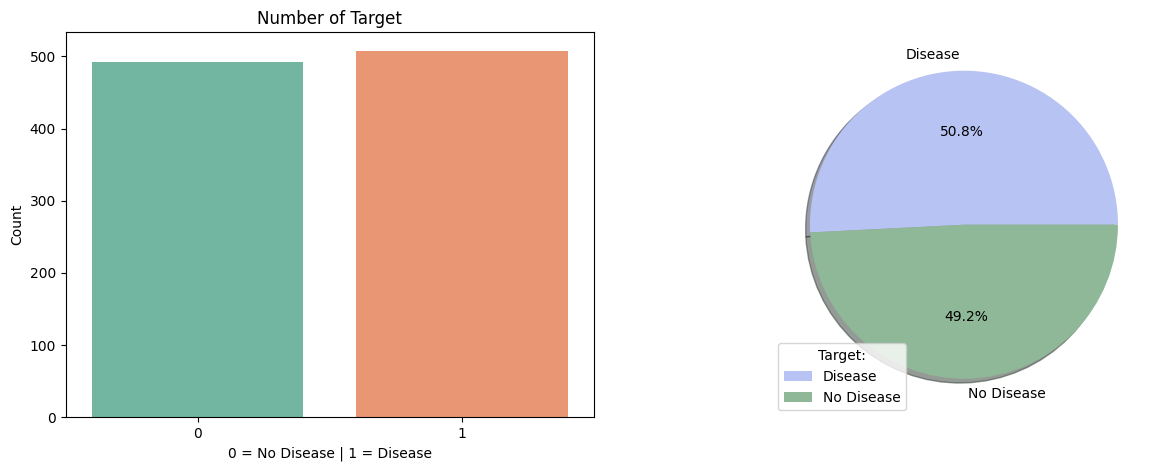

In [ ]:
# Visualisasi jumlah nilai target dalam dataset
plt.figure(figsize=(15,5))

# Membuat bar plot yang menunjukkan jumlah nilai target
plt.subplot(1, 2, 1)
sns.countplot(x = "target", data = df, palette = "Set2")
plt.title("Number of Target")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Count")

# Membuat pie chart yang menunjukkan proporsi nilai target
plt.subplot(1, 2, 2)
plt.pie(df["target"].value_counts(), labels = ["Disease", "No Disease"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C3F3",  "#8EB897"])
plt.legend(title = "Target:")

# Menampilkan plot
plt.show()




1.   **plt.figure :**  Mengatur ukuran keseluruhan gambar (figure) untuk plot yang akan dibuat
2. **plt.subplot(1, 2, 1) :** Menunjukkan bahwa subplot ini adalah yang pertama dari dua subplot yang ada di satu baris.
3. **sns.countplot(x = "target", data = df, palette = "Set2") :** Membuat bar plot untuk menghitung jumlah nilai target (0 dan 1) dalam dataset.
4. **plt.title("Number of Target") :** Memberikan judul pada plot.
5. **plt.xlabel("0 = No Disease | 1 = Disease") :** Memberikan label pada sumbu x.
6. **plt.ylabel("Count") :** Memberikan label pada sumbu y.
7. **plt.subplot(1, 2, 2) :** Menunjukkan bahwa subplot ini adalah yang kedua dari dua subplot yang ada di satu baris.
8. **plt.pie(df["target"].value_counts(), labels = ["Disease", "No Disease"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C3F3", "#8EB897"]) :** Membuat pie chart dengan proporsi nilai target (0 dan 1) dalam dataset, menggunakan warna dan label yang ditentukan.
9. **plt.legend(title = "Target:") :** Menambahkan legenda dengan judul "Target".
10. **plt.show() :** Menampilkan semua plot yang telah dibuat.
****
**Hasil**

output dari bar plot dan box plot menunjukan bahwa data relatif seimbang dengan target dimana pada dataset individu yang memiliki penyakit jantung **(1)** sebesar **50,8%** dan individu yang tidak memiliki penyakit jantung **(2)** sebesar **49,2%**.


**Visualisasi Fitur Kategorikal**

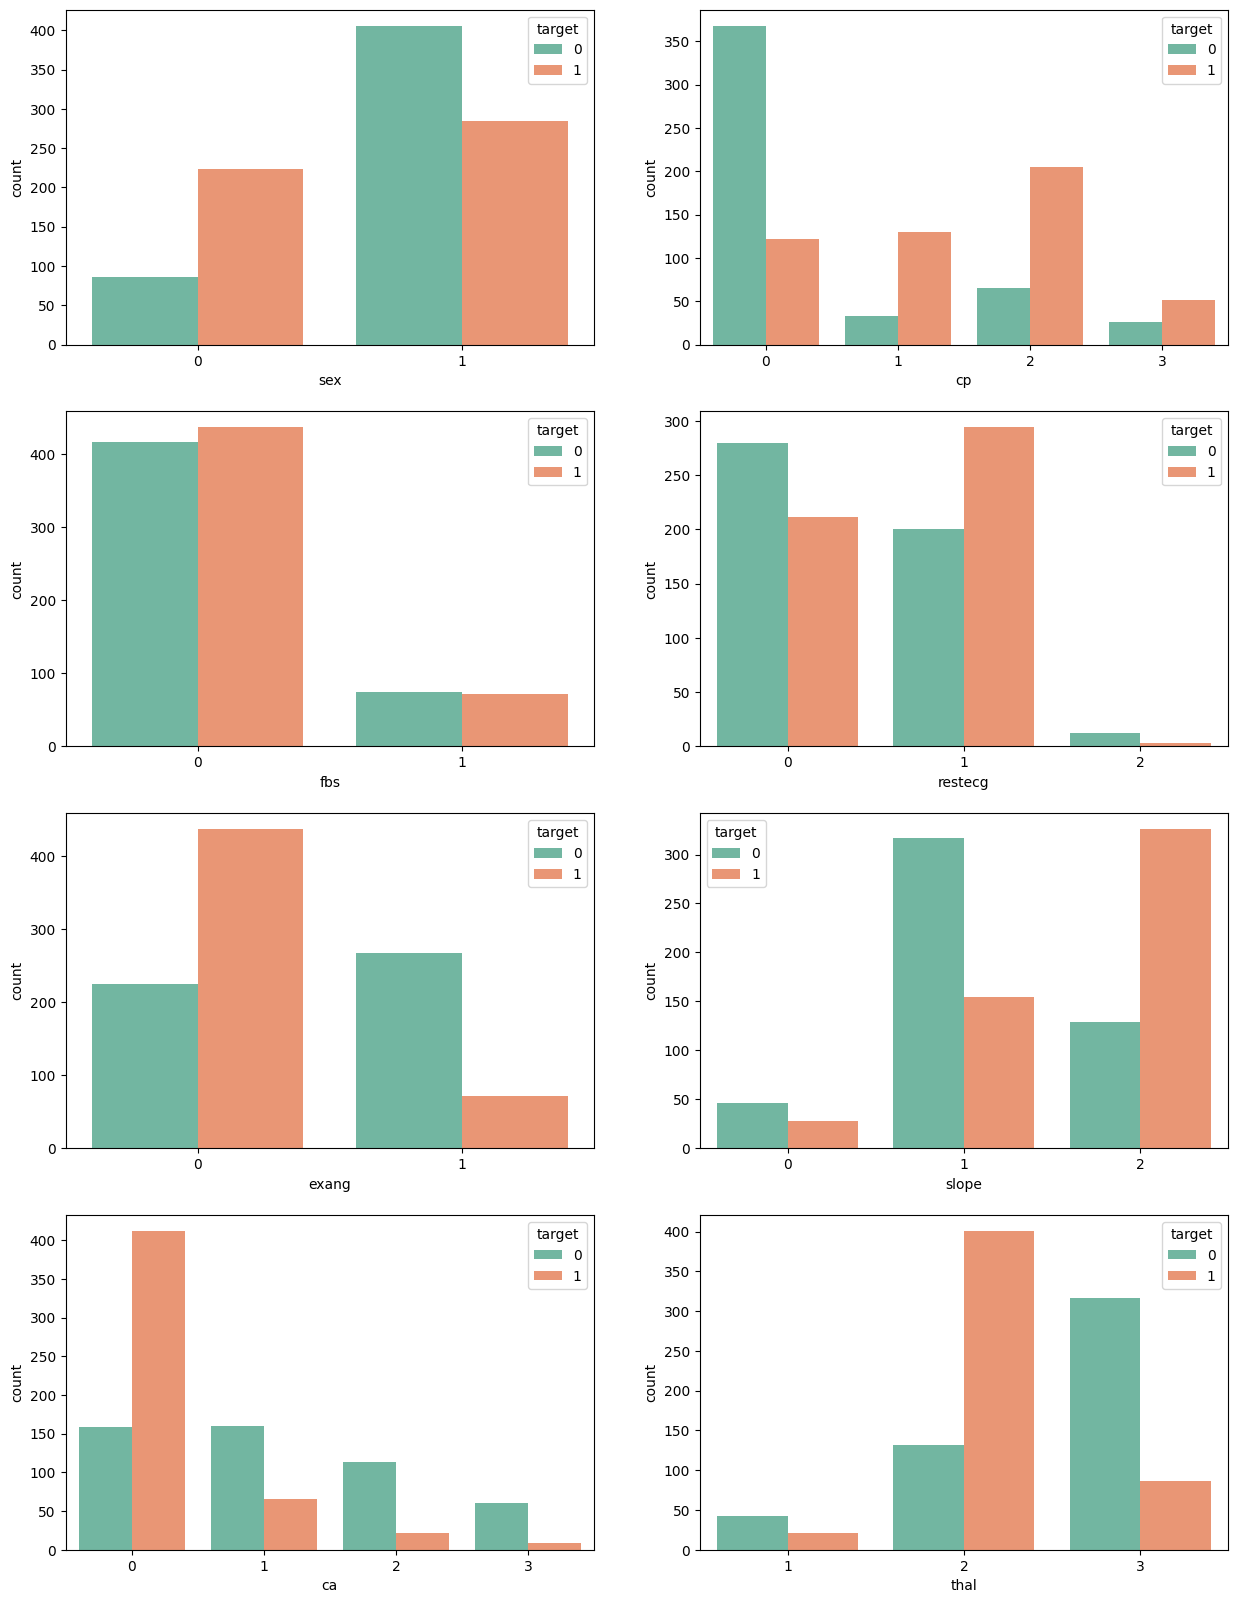

In [ ]:
# Visualisasi distribusi fitur kategorikal berdasarkan nilai target
i = 0
plt.figure(figsize=(15,20))

# Membuat plot untuk setiap fitur kategorikal
for categorical_feature in categorical_feature_list:
    i += 1
    plt.subplot(4, 2, i)

    # Membuat countplot yang menunjukkan jumlah setiap kategori berdasarkan nilai target
    sns.countplot(x = df[categorical_feature], data = df, hue = "target", palette = "Set2")

# Menampilkan plot
plt.show()

**i** dan **plt.figure() :** Menginisialisasi variabel untuk iterasi dan mengatur ukuran gambar (figure).

**for categorical_feature in categorical_feature_list :** Membuat countplot untuk setiap fitur kategorikal dalam  **categorical_feature_list**.

**plt.show() :** Menampilkan semua plot yang telah dibuat.
****

**Hasil**

1. **Sex (Jenis Kelamin),** Mayoritas individu dengan penyakit jantung (label 1) adalah laki-laki(kode 1).
Sebaliknya, perempuan (kode 0) lebih banyak ditemukan pada invididu tanpa penyakit jantung (label 0).

2. **cp (Chest Pain Type),** Tipe nyeri dada 0 (typical angina) paling banyak pada individu tanpa penyakit jantung. Tipe nyeri dada 1, 2, dan 3 lebih sering ditemukan pada individu dengan penyakit jantung.

3. **fbs (Fasting Blood Sugar),** Sebagian besar individi memiliki nilai fbs < 120 mg/dl (kode 0), baik pada kelompok dengan penyakit jantung maupun tanpa penyakit jantung. Nilai fbs >= 120 mg/dl (kode 1) lebih sedikit, namun masih menunjukkan distribusi serupa antara dua kelompok.

4. **restecg (Resting Electrocardiographic Results),** individu dengan nilai restecg 0 (normal) lebih banyak ditemukan pada kelompok tanpa penyakit jantung. Nilai restecg 1 dan 2 lebih sering ditemukan pada individu dengan penyakit jantung.

5. **exang (Exercise Induced Angina),** Angina yang diinduksi oleh olahraga (kode 1) lebih umum pada individu dengan penyakit jantung. individu tanpa angina yang diinduksi oleh olahraga (kode 0) lebih banyak ditemukan pada kelompok tanpa penyakit jantung.

6. **slope (Slope of the Peak Exercise ST Segment),** Slope tipe 2 (downsloping) lebih sering ditemukan pada individu dengan penyakit jantung. Slope tipe 1 (flat) juga banyak ditemukan pada individu dengan penyakit jantung, namun slope tipe 0 (upsloping) lebih banyak pada individu tanpa penyakit jantung.

7. **ca (Number of Major Vessels Colored by Fluoroscopy),** individu dengan nilai ca 0 (tidak ada pembuluh darah utama yang terkena) lebih banyak ditemukan pada kelompok tanpa penyakit jantung. Nilai ca 1, 2, dan 3 lebih sering ditemukan pada individu dengan penyakit jantung.

8. **thal (Thalassemia),** individu dengan nilai thal 2 (normal) lebih banyak ditemukan pada kelompok tanpa penyakit jantung. Nilai thal 3 (fixed defect) lebih sering ditemukan pada individu dengan penyakit jantung.




**Visualisasi Fitur Numerikal**

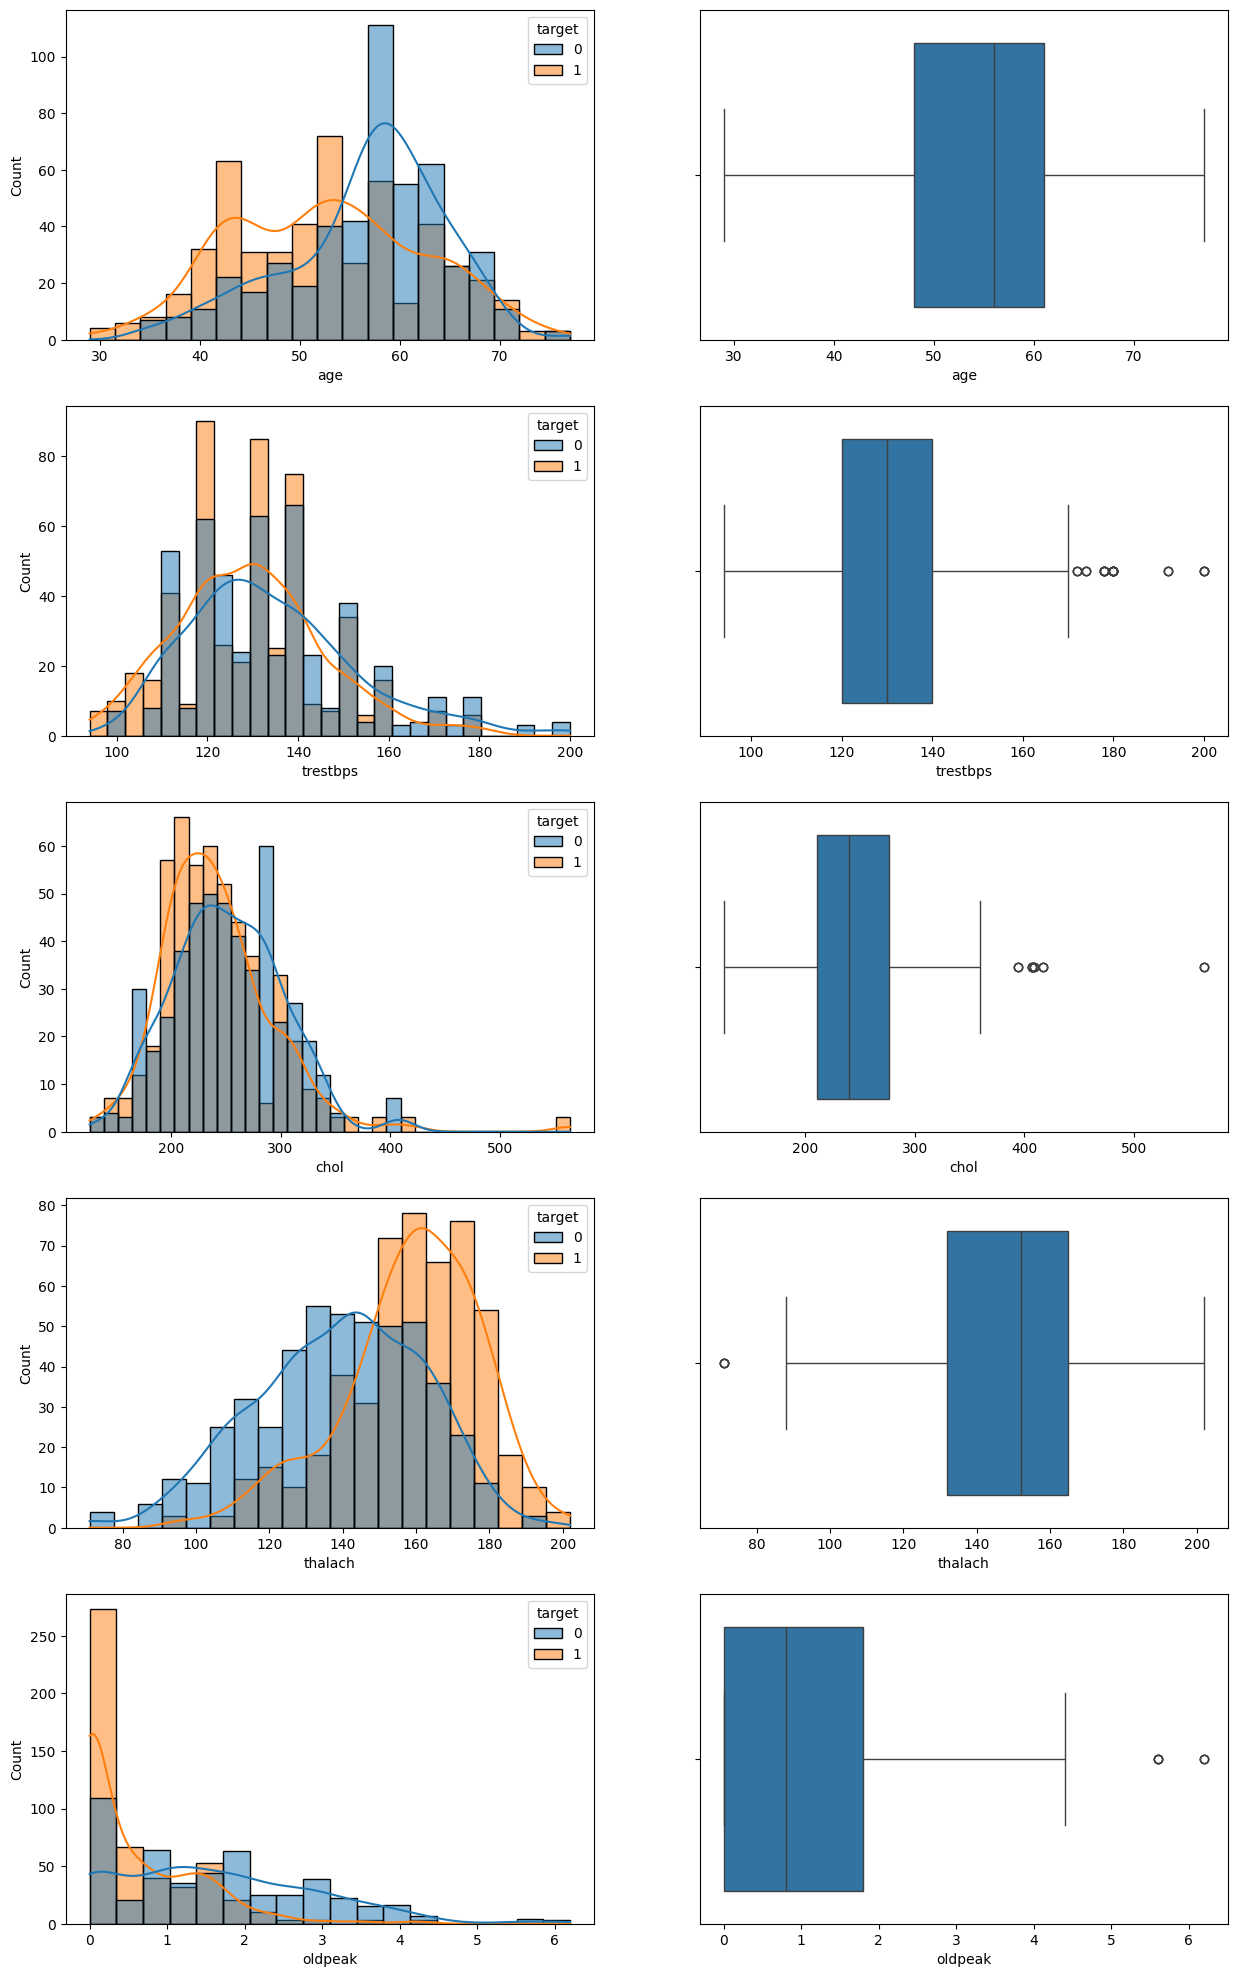

In [ ]:
# Visualisasi distribusi fitur numerikal berdasarkan nilai target
i = 0
plt.figure(figsize=(15,30))

# Membuat dua plot untuk setiap fitur numerikal
for numerical_feature in numerical_feature_list:

    i += 1
    plt.subplot(6, 2, i)
    # Membuat histogram yang menunjukkan distribusi nilai fitur berdasarkan nilai target
    sns.histplot(x = df[numerical_feature], data = df, kde = True, hue = "target")

    i += 1
    plt.subplot(6, 2, i)
    # Membuat boxplot yang menunjukkan distribusi nilai fitur secara umum
    sns.boxplot(x = df[numerical_feature], data = df)

# Menampilkan plot
plt.show()

**i** dan **plt.figure() :** Menginisialisasi variabel untuk iterasi dan mengatur ukuran gambar (figure).

**for numerical_feature in numerical_feature_list :** Membuat histogram dan boxplot untuk setiap fitur numerikal dalam **numerical_feature_list**.

**plt.show() :** Menampilkan semua plot yang telah dibuat.

****
**Hasil**
1. **age (Umur),** Distribusi umur relatif serupa antara dua kelompok, namun ada sedikit pergeseran ke arah umur yang lebih muda pada individu dengan penyakit jantung. Boxplot menunjukkan beberapa outlier pada kedua kelompok, dengan rentang umur yang lebih luas pada individu tanpa penyakit jantung.

2. **trestbps (Resting Blood Pressure),** Distribusi tekanan darah istirahat (trestbps) relatif serupa antara dua kelompok. Boxplot menunjukkan beberapa outlier dengan nilai tekanan darah tinggi pada kedua kelompok, namun lebih banyak pada individu tanpa penyakit jantung.

3. **chol (Serum Cholesterol), Distribusi kolesterol serum (chol)** menunjukkan bahwa individu dengan penyakit jantung cenderung memiliki kolesterol lebih tinggi. Boxplot menunjukkan beberapa outlier dengan nilai kolesterol sangat tinggi pada kedua kelompok.

4. **thalach (Maximum Heart Rate Achieved),** Individu dengan penyakit jantung cenderung memiliki nilai thalach yang lebih rendah. Boxplot menunjukkan beberapa outlier, dengan rentang yang lebih luas pada individu tanpa penyakit jantung.

5. **oldpeak (ST Depression Induced by Exercise Relative to Rest),** Individu dengan penyakit jantung cenderung memiliki nilai oldpeak yang lebih tinggi. Boxplot menunjukkan beberapa outlier pada kedua kelompok, dengan rentang yang lebih luas pada individu dengan penyakit jantung.

****
Outlier yang muncul dalam visualisasi numerikal tidak memiliki dampak signifikan pada analisis dan model klasifikasi karena beberapa alasan. Algoritma SVM yang digunakan cukup robust terhadap outlier, memastikan bahwa outlier tidak mengubah hasil model secara berlebihan dan proses normalisasi juga akan membantu mengurangi dampaknya. Selain itu, outlier hanya merupakan sebagian kecil dari data keseluruhan dan tidak berkorelasi kuat dengan target, sehingga tidak mempengaruhi prediksi secara signifikan.

**Correlation Matrix**

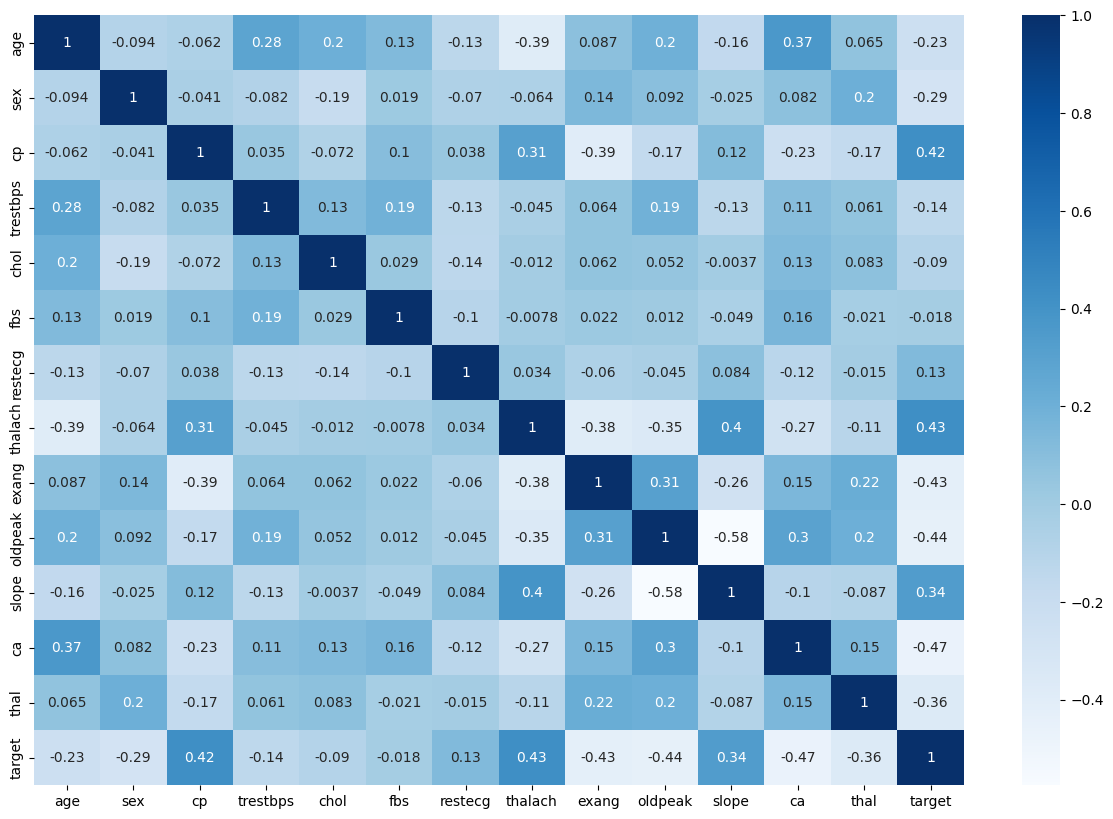

In [ ]:
# Menghitung matrix correlation untuk dataset
corr = df.corr()

# Membuat heatmap untuk visualisasi matrix korelasi
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="Blues")

# Menampilkan heatmap
plt.show()

**corr = df.corr(),** Menghitung matriks korelasi antara semua pasangan fitur dalam dataset.
**plt.figure() dan sns.heatmap(),** Membuat heatmap untuk visualisasi matriks korelasi.
**plt.show(),** Menampilkan heatmap yang telah dibuat.

****
**Hasil**
1. **Fitur cp dan target memiliki korelasi positif kuat (0.42):** Ini menunjukkan bahwa jenis nyeri dada (chest pain type) memiliki hubungan positif yang kuat dengan diagnosis penyakit jantung.
2. **Fitur thalach dan target memiliki korelasi positif (0.43)**: Ini menunjukkan bahwa maksimal denyut jantung yang dicapai juga berhubungan positif dengan diagnosis penyakit jantung.
3. **Fitur oldpeak dan target memiliki korelasi negatif (-0.44):** Ini menunjukkan bahwa depresi ST yang diinduksi oleh latihan relatif terhadap istirahat memiliki hubungan negatif dengan diagnosis penyakit jantung.
4. Korelasi antar fitur lain juga bisa diamati, namun untuk analisis ini fokusnya lebih pada bagaimana fitur berkorelasi dengan target.

# **Featured Engineering**

**Features Categorical**

In [ ]:
# Mengodekan fitur kategorikal menggunakan fungsi get_dummies
df = pd.get_dummies(df, columns = categorical_feature_list)

**df = pd.get_dummies(),** Mengonversi fitur kategorikal menjadi bentuk numerik menggunakan one-hot encoding.
 * **df = pd.get_dummies()** menghasilkan dummy variable untuk setiap kategori di fitur kategorikal, sehingga setiap kategori diwakili sebagai kolom biner.


**Features Numerical**

In [ ]:
# Menyekalakan fitur numerikal menggunakan fungsi StandardScaler
scaler = StandardScaler()
df[numerical_feature_list] = scaler.fit_transform(df[numerical_feature_list])

**scaler = StandardScaler()** dan **df[numerical_feature_list] = scaler.fit_transform(),** Menormalisasikan fitur numerikal agar memiliki distribusi dengan mean 0 dan standar deviasi 1.
  * **StandardScaler** menghilangkan mean dan menskalakan data ke unit varians. **fit_transform** digunakan untuk menghitung mean dan standar deviasi fitur dan kemudian mengubah data.

# **Labeling**

**Splitting Data**

In [ ]:
# Membuat variabel untuk data fitur dan nilai target
X = df.drop(["target"], axis=1) # Data fitur
y = df["target"].values # Nilai target

**x,** Berisi semua kolom kecuali kolom "target"

**y,** Berisi nilai-nilai dari kolom "target".

**Saya menggunakan semua atribut kecuali 'target' sebagai X untuk meningkatkan akurasi predisksi model karena menurut saya semua atribut pada dataset ini saling berkorelasi.**

In [ ]:
# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

**train_test_split** membagi dataset dengan 70% untuk training dan 30% untuk testing, dengan **random_state** yang sama untuk memastikan hasil yang dapat direproduksi.

**Train dan Test Model**

In [ ]:
# Menetapkan random_state
random_state = 128

# Mendefinisikan model machine learning
model = [SVC(random_state = random_state, probability=True)]

# Mendefinisikan daftar nama kelas
model_names = ["SVM"]

# Mendefinisikan grid hyperparameter untuk setiap model
svm_params = {"kernel" : ["rbf"],
              "gamma": [0.001, 0.01, 0.1],
              "C": [1,10,50,100,200]}

# Mendefinisikan list grid hyperparameter
param_grids = [svm_params]

**random_state,** Digunakan untuk mengontrol proses pengacakan agar hasil dapat direproduksi.

**model,** **SVC** digunakan untuk klasifikasi, dan **probability=True** mengaktifkan penghitungan probabilitas prediksi.

**model_names,** Nama model disimpan dalam list model_names

**svm_params,** **svm_params** menentukan kernel **rbf**, dan berbagai nilai **gamma** dan **C** untuk tuning hyperparameter SVM.

**param_grids,** Mengelompokkan parameter grid dalam satu list.

# **Evaluation Model**

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Machine Learning Models: SVM
Cross Validation Scores: 0.972857142857143
Best Parameters: SVC(C=50, gamma=0.1, probability=True, random_state=128)

-----------------------------------------------------

Train Accuracy of Classifier:  1.0
Test Accuracy of Classifier:  0.9666666666666667
The F1 Score of Classifier:  0.9642857142857143

-----------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       159
           1       0.97      0.96      0.96       141

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


-----------------------------------------------------

ROC Curve: 



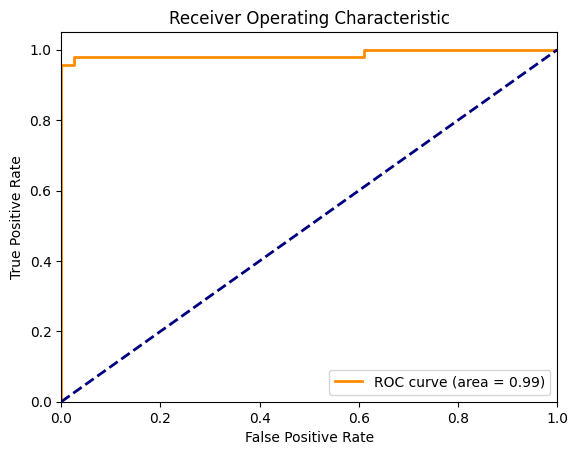


-----------------------------------------------------

Confusion Matrix: 



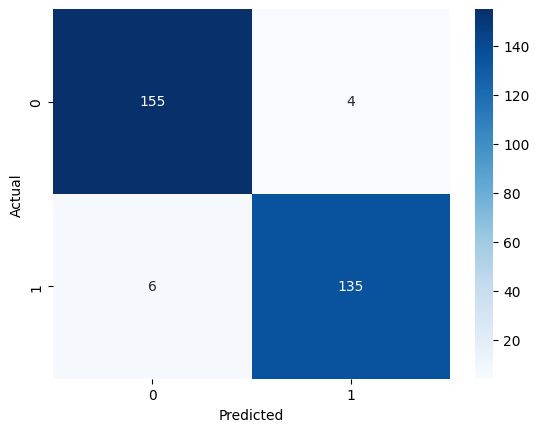


****************************************************************



In [ ]:
# Mendefinisikan dua list untuk menyimpan hasil dan estimator terbaik
cv_result = []
best_estimators = []

# Iterasi pada model dan grid hyperparameter
for i in range(len(model)):

    # Mendefinisikan skema cross-validation Stratified K-fold
    cv = StratifiedKFold(n_splits = 5)

    # Mendefinisikan grid search strategi
    clf = GridSearchCV(model[i],
                       param_grid=param_grids[i],
                       cv = cv,
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)

    # Mencetak skor cross validation, parameter terbaik, dan akurasi train dan test model
    clf.fit(X_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)

    print("Machine Learning Models:", model_names[i])
    print("Cross Validation Scores:", cv_result[i])
    print("Best Parameters:", best_estimators[i])
    print("\n-----------------------------------------------------\n")

    print("Train Accuracy of Classifier: ", accuracy_score(clf.predict(X_train), y_train))
    print("Test Accuracy of Classifier: ", accuracy_score(clf.predict(X_test), y_test))
    print("The F1 Score of Classifier: ", f1_score(clf.predict(X_test), y_test))
    print("\n-----------------------------------------------------\n")

    # Menampilkan hasil dari klasifikasi
    print("Classification Report: \n", classification_report(y_test, clf.predict(X_test)))
    print("\n-----------------------------------------------------\n")

    # Menampilkan Curva ROC
    print("ROC Curve: \n")
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print("\n-----------------------------------------------------\n")

    # Menampilkan Confusion Matrix
    print("Confusion Matrix: \n")
    conf_matrix = confusion_matrix(y_test, clf.predict(X_test))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n****************************************************************\n")


* **cv_result** dan **best_estimators,** Menyediakan tempat untuk menyimpan hasil cross-validation dan estimator terbaik. **cv_result** menyimpan skor cross-validation terbaik, dan **best_estimators** menyimpan model terbaik setelah tuning.

* **for i in range(),**  Memulai loop untuk iterasi melalui model dan parameter grid.

* **cv = StratifiedKFold(),** StratifiedKFold membagi data menjadi 5 fold, menjaga distribusi kelas yang sama di setiap fold.
* **clf = GridSearchCV(),** GridSearchCV mengkombinasikan model dengan parameter grid, menggunakan cross-validation dan mengukur kinerja dengan akurasi.
* **clf.fit(), cv_result.append() dan best_estimators.append(),** clf.fit melatih model pada data training, cv_result menyimpan skor terbaik, dan best_estimators menyimpan model terbaik.
* **roc_curve,** digunakan untuk menghitung nilai TPR dan FPR, dan auc menghitung Area Under Curve. Plot ROC menampilkan kinerja model dalam memisahkan kelas.
* **confusion_matrix dan sns.heatmap(),** confusion_matrix menghitung jumlah prediksi benar dan salah. sns.heatmap menampilkan matriks ini dalam bentuk grafik yang mudah dibaca.

****
**Hasil**

1. **Cross Validation Score**
  * Cross Validation Scores: 0.9372815748257143: Ini adalah rata-rata akurasi yang diperoleh dari cross-validation, menunjukkan bahwa model memiliki performa yang konsisten dengan akurasi sekitar 93.73%.

2. **Best Parameters:**
  * **Best Parameters: SVC(C=50, gamma=0.1, probability=True, random_state=128):** Parameter terbaik yang ditemukan oleh GridSearchCV untuk model SVM, termasuk nilai C, gamma, dan pengaturan lainnya.

3. **Train and Test Accuracy:**
  * **Train Accuracy of Classifier: 1.0:** Model memiliki akurasi 100% pada data pelatihan, menunjukkan bahwa model sangat baik dalam mengenali pola pada data pelatihan.

  * **Test Accuracy of Classifier: 0.9666666666666667:** Akurasi pada data pengujian adalah sekitar 96.67%, menunjukkan bahwa model juga berkinerja baik pada data yang tidak terlihat sebelumnya.

4. **Classification Report:**
  * **Classification Report** memberikan metrik evaluasi seperti precision, recall, dan f1-score untuk masing-masing kelas (0 = No Disease, 1 = Disease).

  * Precision, recall, dan f1-score untuk kedua kelas adalah tinggi, menunjukkan model seimbang dalam mengklasifikasikan kedua kelas.

5. **ROC Curve:**

  * **ROC Curve** menunjukkan performa model dalam hal trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR).

  * **Area Under the Curve (AUC) = 0.99:** Nilai AUC yang sangat tinggi menunjukkan bahwa model memiliki kemampuan diskriminatif yang sangat baik antara kelas positif dan negatif.

6. **Confusion Matrix:**

  * **Confusion Matrix** memberikan tampilan visual dari prediksi model versus nilai aktual.

  * Matriks menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Di sini, model mengklasifikasikan dengan benar sebagian besar sampel dengan hanya sedikit kesalahan.

# **Kesimpulan**

Hasil proyek ini menunjukkan bahwa model SVM yang saya gunakan memiliki kinerja yang sangat baik dalam mendeteksi penyakit jantung. Dengan cross-validation score rata-rata sebesar 93.73%, model ini menunjukkan konsistensi yang kuat dalam akurasi. Parameter terbaik yang ditemukan oleh GridSearchCV memastikan bahwa model ini dioptimalkan dengan baik. Akurasi pelatihan yang sempurna (100%) dan akurasi pengujian yang tinggi (96.67%) menunjukkan bahwa model ini sangat efektif dalam mengenali pola baik pada data pelatihan maupun data yang belum pernah dilihat sebelumnya. Classification report mengindikasikan bahwa model memiliki nilai precision, recall, dan f1-score yang tinggi untuk kedua kelas, menunjukkan keseimbangan yang baik dalam klasifikasi. ROC curve dengan AUC sebesar 0.99 memperlihatkan kemampuan diskriminatif model yang sangat baik antara kelas positif dan negatif. Confusion matrix menegaskan bahwa model membuat sedikit kesalahan prediksi, memperkuat validitas dan reliabilitas dari hasil klasifikasi.

Akhir kata, mohom maaf apabila pada projek uas saya masih terdapat banyak kesalahan dan kekurangan. Terima kasih banyak bu

